<a href="https://colab.research.google.com/github/porgill-prosper/airflow/blob/master/LinearModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="Colaboratory logo" height="45px" src="/img/colab_favicon.ico" align="left" hspace="10px" vspace="0px"></p>

<h1>Linear Regression</h1>

PyTorch


In [0]:
#!pip3 install torch

In [0]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 0, 'x')

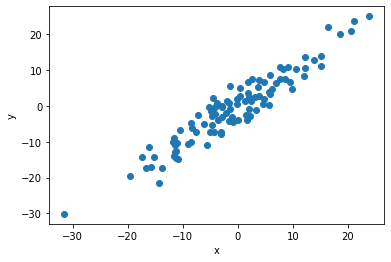

In [3]:
x = torch.randn(100, 1)*10
y = x + torch.randn(100, 1)*3
plt.plot(x.numpy(), y.numpy(), 'o')
plt.ylabel('y')
plt.xlabel('x')

In [4]:
torch.manual_seed(1)
model = nn.Linear(in_features=1, out_features=1)
print(model.bias, model.weight)

Parameter containing:
tensor([-0.4414], requires_grad=True) Parameter containing:
tensor([[0.5153]], requires_grad=True)


In [0]:
class LR(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)
  def forward(self, x):
    pred = self.linear(x)
    return pred

In [6]:
torch.manual_seed(1)
model = LR(1, 1)
#print(list(model.parameters()))
print(model)

LR(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [0]:
#x = torch.tensor([[1.0], [2.0]])
#print(model.forward(x))

In [0]:
[w, b] = model.parameters()
#w1 = w[0][0].item()
#b1 = b[0].item()
#print(w1, b1)
def get_params():
  return (w[0][0].item(), b[0].item())

In [0]:
def plot_fit(title):
  plt.title = title
  w1, b1 = get_params()
  x1 = np.array([-30, 30])
  y1 = w1*x1 + b1
  plt.plot(x1, y1, 'r')
  plt.scatter(x,y)
  plt.show()


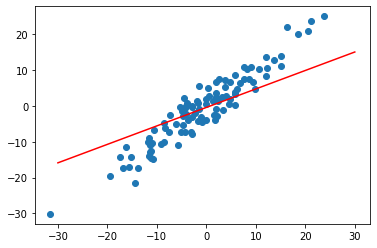

In [10]:
plot_fit('initial model')

In [0]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)


In [12]:
epochs = 100
losses = []
for i in range(epochs):
  y_pred = model.forward(x)
  loss = criterion(y_pred, y)
  print("epoch:", i, "loss:", loss.item())

  losses.append(loss)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch: 0 loss: 29.853628158569336
epoch: 1 loss: 24.58599090576172
epoch: 2 loss: 20.696008682250977
epoch: 3 loss: 17.8228816986084
epoch: 4 loss: 15.700340270996094
epoch: 5 loss: 14.131854057312012
epoch: 6 loss: 12.972358703613281
epoch: 7 loss: 12.114802360534668
epoch: 8 loss: 11.480164527893066
epoch: 9 loss: 11.010117530822754
epoch: 10 loss: 10.661617279052734
epoch: 11 loss: 10.402884483337402
epoch: 12 loss: 10.210467338562012
epoch: 13 loss: 10.067051887512207
epoch: 14 loss: 9.959856033325195
epoch: 15 loss: 9.879446029663086
epoch: 16 loss: 9.818857192993164
epoch: 17 loss: 9.77294635772705
epoch: 18 loss: 9.737914085388184
epoch: 19 loss: 9.710958480834961
epoch: 20 loss: 9.690004348754883
epoch: 21 loss: 9.673523902893066
epoch: 22 loss: 9.660383224487305
epoch: 23 loss: 9.649748802185059
epoch: 24 loss: 9.640998840332031
epoch: 25 loss: 9.633672714233398
epoch: 26 loss: 9.627437591552734
epoch: 27 loss: 9.622035026550293
epoch: 28 loss: 9.617281913757324
epoch: 29 loss

Text(0.5, 0, 'epoch')

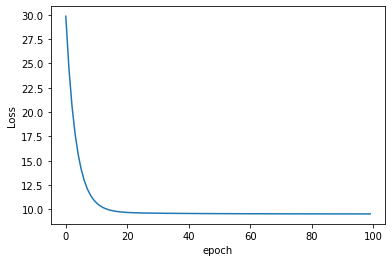

In [13]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

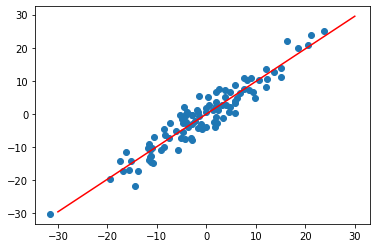

In [14]:
plot_fit("Trained Model")